In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
h = 6.6261 * 10-27 #cm2 g s-1
me = 9.1093837 * 10**-28 #g 
#mp = 1.67262192 * 10**-27
mu = 0.62 #from 1b
mue = 1.18
#a = (7.6 * 10**-5) #erg/m^3 K^4
ne = 6 * 10**27 #cm^−3,
k = 1.3807 * 10**(-16) #cm2 g s-2 K-1


## Problem 2

In [15]:
#a: Prad = Pgas
ya2 = np.log10(3.2*10**7*mu**(-1/3)) + 10/3
ya1 = np.log10(3.2*10**7*mu**(-1/3)) - 10/3
print(f'The boundaries are: {ya1:.2f} and {ya2:.2f}')

The boundaries are: 4.24 and 10.91


In [16]:
#Pgas = PNR
yb1 = np.log10(1.21*10**5*mu*mue**(-5/3))
yb2 = np.log10(1.21*10**5*mu*mue**(-5/3)) + (2/3*6)
print(f'The boundaries are: {yb1:.2f} and {yb2:.2f}')

The boundaries are: 4.76 and 8.76


In [17]:
#c: Pgas = PER
yc1 = np.log10(1.5*10**7*mu*mue**(-4/3)) + 6/3
yc2 = np.log10(1.5*10**7*mu*mue**(-4/3)) + 10/3
print(f'The boundaries are: {yc1:.2f} and {yc2:.2f}')

The boundaries are: 8.87 and 10.21


In [18]:
#d: NR/ER
xd = np.log10(9.7*10**5*mue)
print(f'The boundary occurs at log(rho) = {xd:.2f}')

The boundary occurs at log(rho) = 6.06


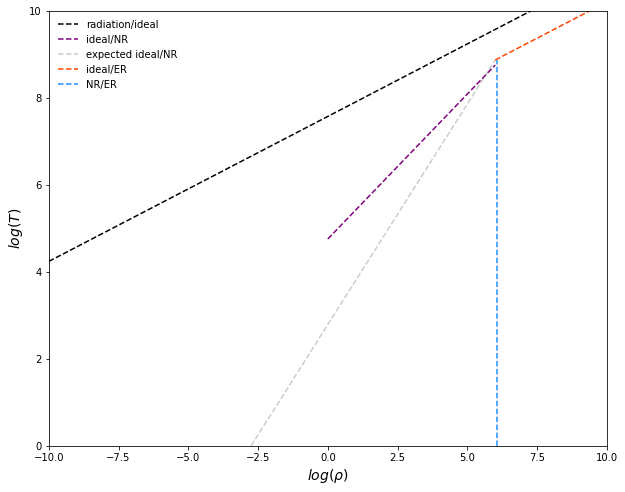

In [19]:
#original:
#e
plt.figure(figsize=(10,8))
plt.plot([-10,10],[ya1,ya2], 'k--',label='radiation/ideal') #a
plt.plot([0,6],[yb1,yb2], '--',color ='purple',label='ideal/NR')
plt.plot([-2.75,6],[0,yc1], '--',color ='gray',label='expected ideal/NR',alpha=0.4)
plt.plot([6,10],[yc1,yc2], '--', color= 'orangered', label= 'ideal/ER') #c
plt.plot([xd,xd],[0,yc1],'--',color='dodgerblue',label='NR/ER') #d

#plt.loglog()
plt.ylim(0,10)
plt.xlim(-10,10)
plt.ylabel(r'$log(T)$', fontsize=14)
plt.xlabel(r'$log(\rho)$', fontsize=14)
plt.legend(frameon=False)
#The grey is what I expected to get for b

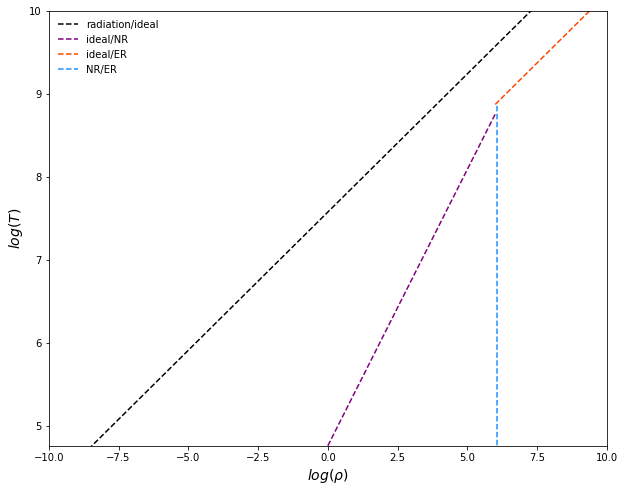

In [20]:
#e
plt.figure(figsize=(10,8))
plt.plot([-10,10],[ya1,ya2], 'k--',label='radiation/ideal') #a
plt.plot([0,6],[yb1,yb2], '--',color ='purple',label='ideal/NR')
#plt.plot([-2.75,6],[0,yc1], '--',color ='gray',label='expected ideal/NR',alpha=0.4)
plt.plot([6,10],[yc1,yc2], '--', color= 'orangered', label= 'ideal/ER') #c
plt.plot([xd,xd],[0,yc1],'--',color='dodgerblue',label='NR/ER') #d

#plt.loglog()
plt.ylim(yb1,10)
plt.xlim(-10,10)
plt.ylabel(r'$log(T)$', fontsize=14)
plt.xlabel(r'$log(\rho)$', fontsize=14)
plt.legend(frameon=False)
#The grey is what I expected to get for b

## Problem 3 ##

In [21]:
T1 = 2 * 10**8
T2 = 2 * 10**7
T3 = 2 * 10**6
p = np.linspace(1e-23,100e-19,10000)

In [22]:
#Maxwell-Boltzmann
u = 4*np.pi*p**2
def mb(T):
  v = ne / (2*np.pi*me*k*T)**(3/2)
  w = -p**2 / (2*me*k*T)
  mbd = u*v*np.e**w
  return mbd

#NR electrons
z = (2*u)/h**3
def nr(T):
  #psi = mu / (k*T)
  psi = np.log((h**3 * ne)/ (2*(2*np.pi*me*k*T)**(3/2)))
  q = (p**2 / (2*me*k*T))-psi
  nnr = z* (1 / (np.e**q + 1))
  return nnr

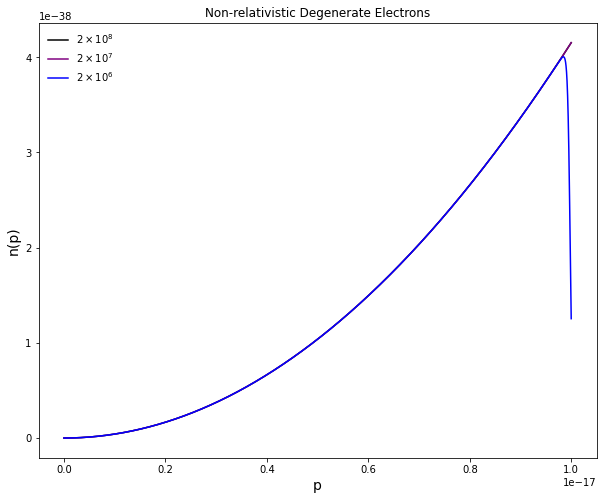

In [23]:
plt.figure(figsize=(10,8))
plt.plot(p,nr(T1),'k',label=r'$2\times10^8$')
plt.plot(p,nr(T2),'purple',label=r'$2\times10^7$')
plt.plot(p,nr(T3),'b',label=r'$2\times10^6$')
plt.title('Non-relativistic Degenerate Electrons')
plt.xlabel('p',fontsize=14)
plt.ylabel('n(p)',fontsize=14)
plt.legend(frameon=False)

For the non-rel. curves, e^(large negative number) goes to 0 (since 1/e^x goes to 0 as x goes to infinity)in python so they're all technically the same curve and thus they plotted over each other here. I tried two different ways to find psi; both methods produce the same plots. 

Though I think this makes sense since degeneracy does not depened on temperature (degeneracy pressure depends on the density of the object). Thus temperature shouldn't have a huge impact on the electron's velocity/momentum. 

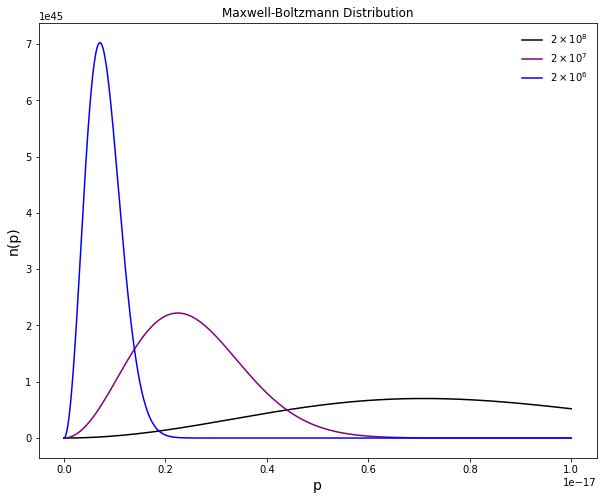

In [24]:
plt.figure(figsize=(10,8))
plt.plot(p,mb(T1), 'k',label=r'$2\times10^8$')
plt.plot(p,mb(T2),'purple',label=r'$2\times10^7$')
plt.plot(p,mb(T3),'b',label=r'$2\times10^6$')
plt.title('Maxwell-Boltzmann Distribution')
plt.xlabel('p',fontsize=14)
plt.ylabel('n(p)',fontsize=14)
plt.legend(frameon=False)

As temperature decreses, we see that the probability of finding an electron at lower momenta increases. This makes sense since the Maxwell-Boltzmann distribution assumes ideal gas, and we know that as an ideal gas heats up, it most move faster.